In [12]:
from transformers import Mask2FormerImageProcessor, Mask2FormerForUniversalSegmentation
import cv2
import torch


In [13]:

processor = Mask2FormerImageProcessor.from_pretrained("facebook/mask2former-swin-large-cityscapes-panoptic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-large-cityscapes-panoptic")



C:\Users\shems\anaconda3\Lib\site-packages\transformers\utils\deprecation.py:165: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)


In [20]:
from PIL import Image
import requests
path = "../image.png"
image = Image.open(path)
inputs = processor(images=image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Set label_ids_to_fuse parameter
label_ids_to_fuse = [1, 2, 3]  # Example label IDs to fuse, adjust based on your needs

# Post-process the outputs
result = processor.post_process_panoptic_segmentation(outputs, target_sizes=[image.size[::-1]], label_ids_to_fuse=label_ids_to_fuse)[0]

# Get the predicted panoptic map
predicted_panoptic_map = result["segmentation"]

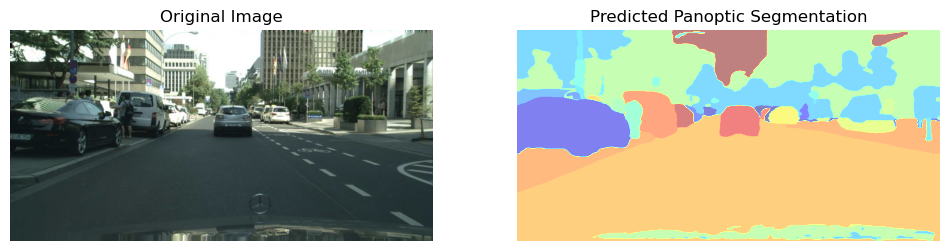

In [21]:
# Visualize the original image and the predicted segmentation
import matplotlib.pyplot as plt
def visualize_results(image, panoptic_map):
    # Create a figure
    plt.figure(figsize=(12, 6))

    # Show the original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    # Show the segmentation map
    plt.subplot(1, 2, 2)
    plt.imshow(panoptic_map, cmap="jet", alpha=0.5)  # use colormap to differentiate segments
    plt.title("Predicted Panoptic Segmentation")
    plt.axis("off")

    plt.show()

# Call the visualization function
visualize_results(image, predicted_panoptic_map)